# Batch mode: Urban sprawl

This notebook illustrates the calculation of urban sprawl indices for several cities in a *batch* mode.

The spatial urban sprawl indices are the same shown in the previous notebook [3-Spatial-indices-Urban-sprawl](https://github.com/lgervasoni/urbansprawl/tree/master/examples/3-Spatial-indices-Urban-sprawl.ipynb). For more details refer to:
* [Calculating spatial urban sprawl indices using open data](https://hal.inria.fr/hal-01535469)

In [1]:
# snippet for relative imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

import matplotlib.pyplot as plt
import osmnx as ox
import urbansprawl as us

ox.config(log_file=True, log_console=True, log_name='batch_sprawl', log_filename='batch_sprawl', use_cache=True)
figsize = (8,6)

### Spatial urban sprawl indices are calculated in batch
* OpenStreetMap data needs to be retrieved and processed for each region of interest
* The urban indices are calculated on a regular point grid
* Sprawl indices are calculated, guided by keyword arguments

In [2]:
# Arguments
process_osm_args = {"retrieve_graph":True, "default_height":3, "meters_per_level":3, "associate_landuses_m2":True, 
                    "mixed_building_first_floor_activity":True, "minimum_m2_building_area":9, "date":None}
grid_step = 200
dispersion_args = {'radius_search': 750, 'use_median': False, 'K_nearest': 50}
landusemix_args = {'walkable_distance': 600, 'compute_activity_types_kde': True, 'weighted_kde': True, 
                   'pois_weight': 9, 'log_weighted': True}
accessibility_args = {'fixed_distance': True, 'fixed_activities': False, 'max_edge_length': 200, 
                      'max_node_distance': 250, 'fixed_distance_max_travel_distance': 2000, 
                      'fixed_distance_max_num_activities': 250, 'fixed_activities_min_number': 20}
indices_computation = {"dispersion":True, "landusemix":True, "accessibility":True}

### Regions of interest
* For each region of interest, a name is given (i.e. a city)
* For example, the Stuttgart's region is determined using the second result of the query: https://www.openstreetmap.org/search?query=stuttgart

In [3]:
# Cities
cities_ref = [ "Florence", "Zagreb", "Stuttgart"]
regions_args = [ {"place":"Florence"}, {"place":"Zagreb"}, {"place":"Stuttgart", "which_result":2} ]

### Compute the sprawl indices

In [4]:
df_indices = {}
for city_ref, region_arg in zip(cities_ref, regions_args):
    # Process spatial indices for input city
    df_indices[city_ref] = us.process_spatial_indices(city_ref, region_arg, grid_step, process_osm_args, dispersion_args, landusemix_args, accessibility_args, indices_computation)

### Results visualization

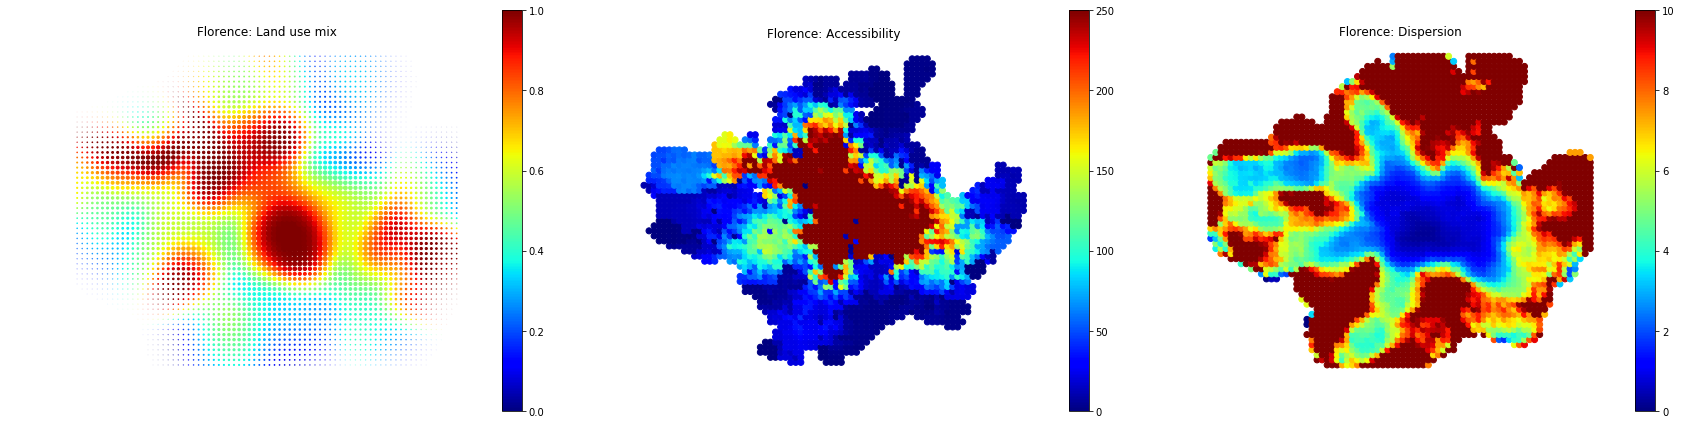

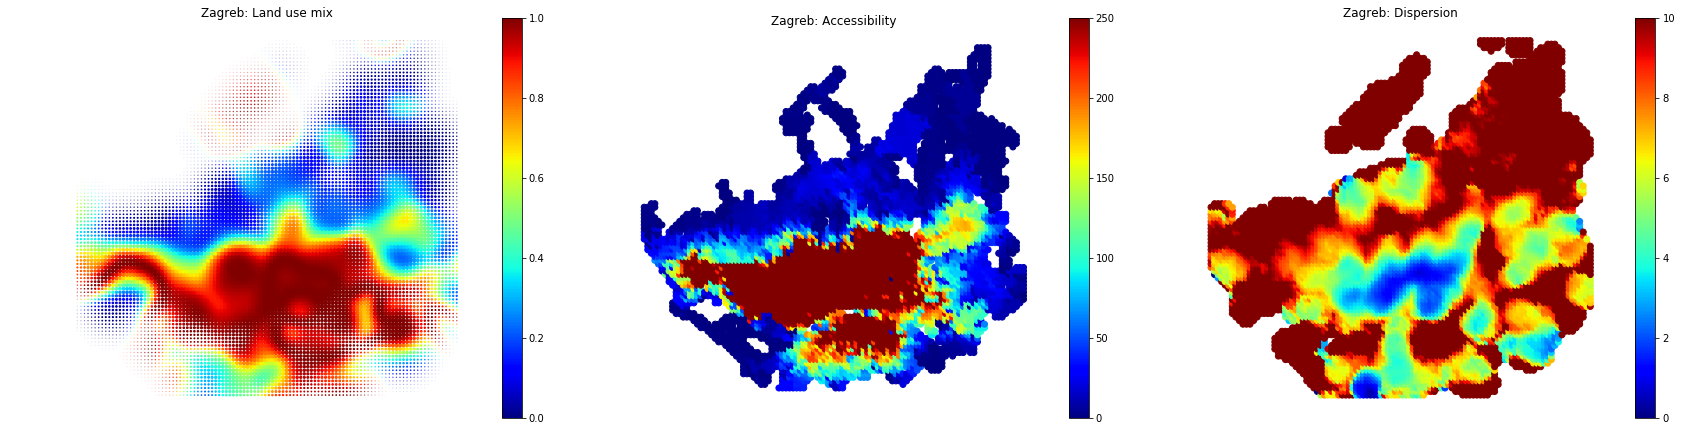

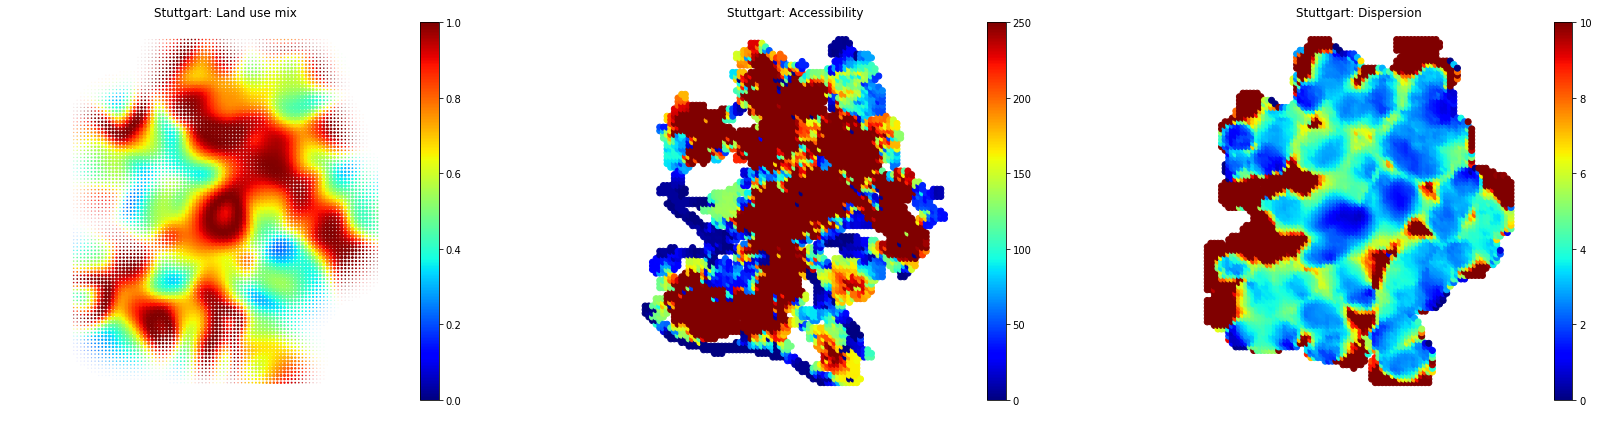

In [5]:
for city_ref in cities_ref:
    # Get city's indices and street network
    df_indices_city = df_indices[city_ref]
    G = us.get_route_graph(city_ref)
    
    # Land use intensity serves as bubble size for land use mix indices
    lum_bubble_size = df_indices_city.landuse_intensity.copy()
    lum_bubble_size[ lum_bubble_size < 1e-5 ] = 0
    
    fig, axs = plt.subplots(1, 3, figsize=(figsize[0] * 3, figsize[1]))
    
    # Title
    axs[0].set_title(city_ref+": Land use mix"); axs[1].set_title(city_ref+": Accessibility"); axs[2].set_title(city_ref+": Dispersion")
    axs[0].axis('off'); axs[1].axis('off'); axs[2].axis('off')
    # Plots
    df_indices_city.plot("landusemix", figsize=figsize, cmap='jet', ax=axs[0], vmin=0, vmax=1, legend=True, markersize=50*lum_bubble_size)
    df_indices_city.plot("accessibility",figsize=figsize, cmap='jet', ax=axs[1], vmin=0, vmax=accessibility_args["fixed_distance_max_num_activities"], legend=True)
    df_indices_city.plot("dispersion",figsize=figsize, cmap='jet', ax=axs[2], vmin=0, vmax=10, legend=True)
    fig.tight_layout()